In [9]:
#Import Library
import cv2
from skimage import color, segmentation, io
from skimage.filters import sobel
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Grayscale')

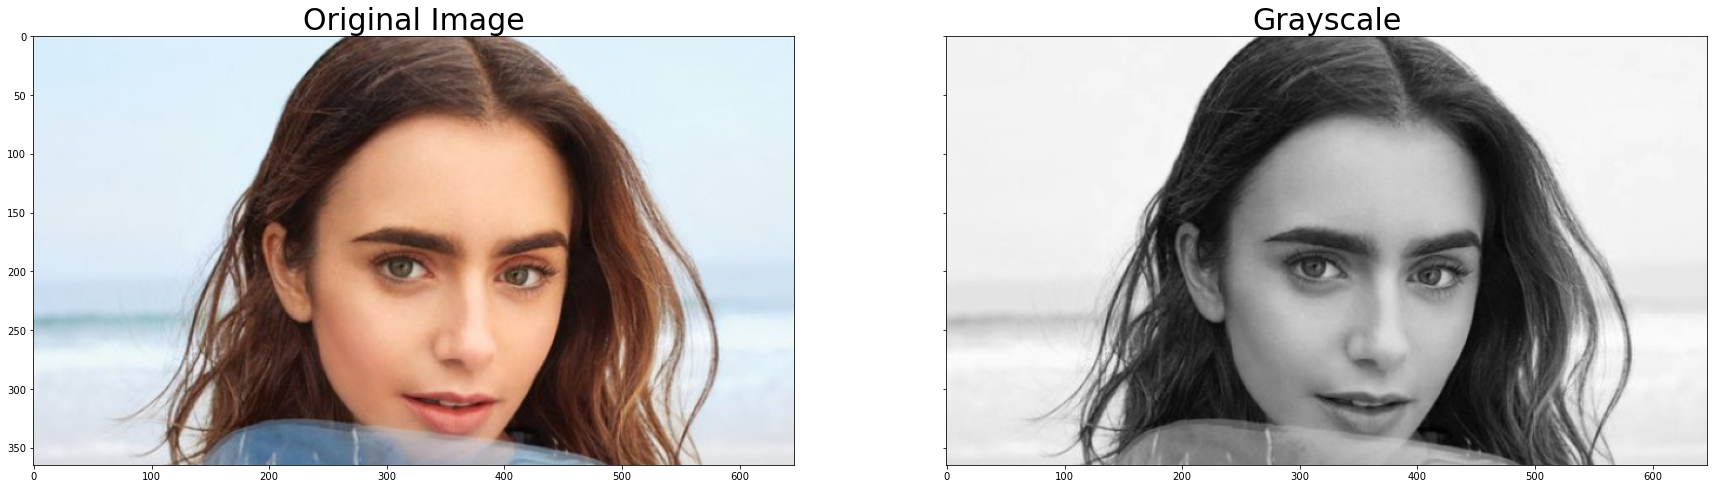

In [10]:
#RGB to Grayscale
foto = io.imread('cek.jpg')
gray = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(30, 25))

axes[0].imshow(foto)
axes[0].set_title('Original Image', size = 30)
axes[1].imshow(gray, cmap=plt.cm.gray)
axes[1].set_title('Grayscale', size = 30)

Text(0.5, 1.0, 'Sobel')

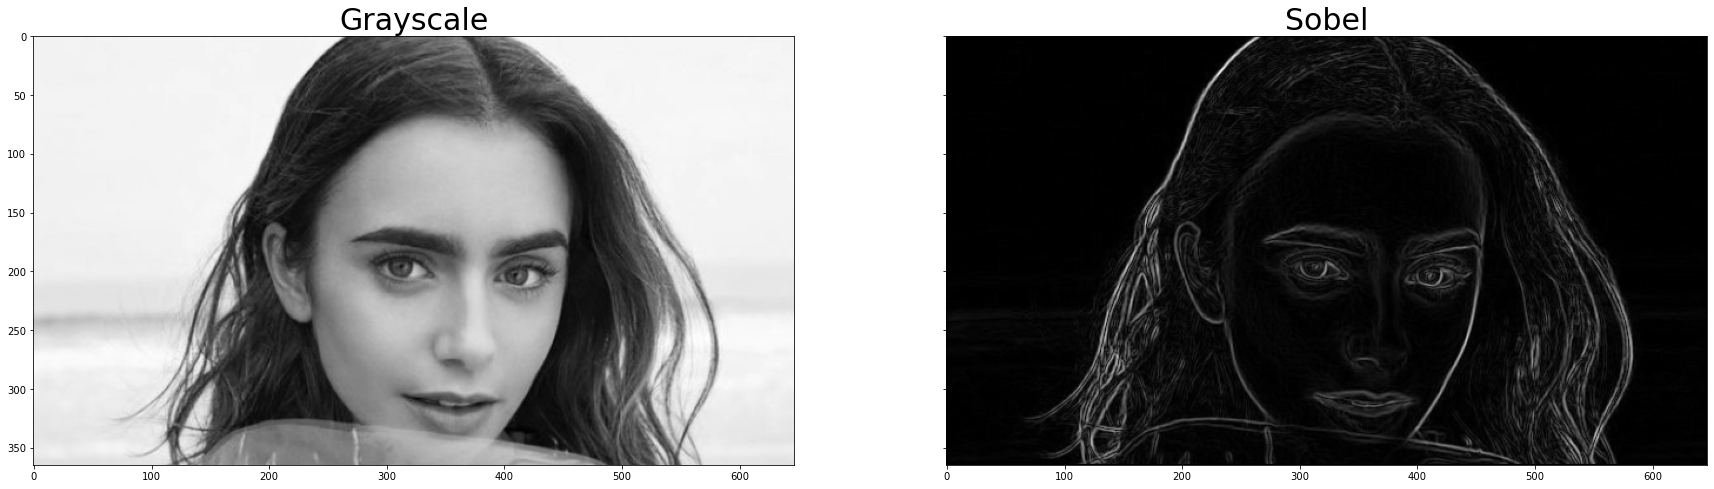

In [11]:
#Contour detection using sobel detection
edges = sobel(gray)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(30, 25))

axes[0].imshow(gray, cmap=plt.cm.gray)
axes[0].set_title('Grayscale', size = 30)
axes[1].imshow(edges, cmap=plt.cm.gray)
axes[1].set_title('Sobel', size = 30)

Text(0.5, 1.0, 'Segmentasi')

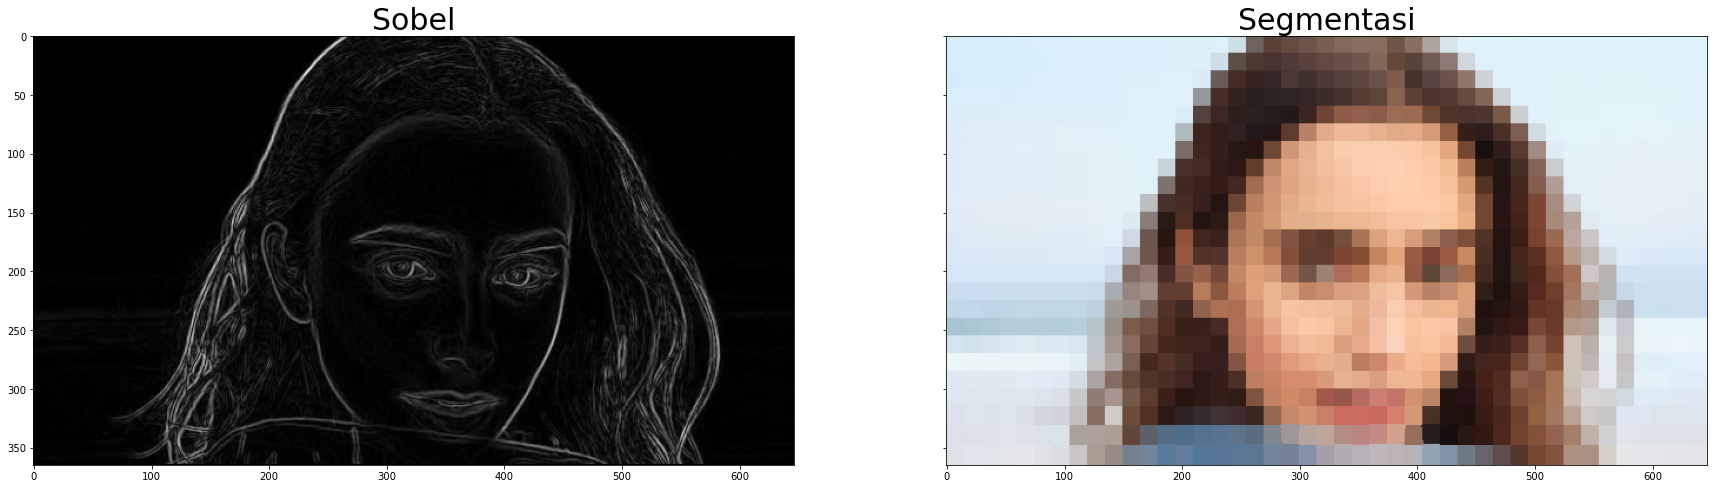

In [12]:
segmentasi_slic = segmentation.slic(edges, n_segments = 1000)
segmentasi = color.label2rgb(segmentasi_slic, foto, kind = 'avg')
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(30, 25))

axes[0].imshow(edges, cmap=plt.cm.gray)
axes[0].set_title('Sobel', size = 30)
axes[1].imshow(segmentasi, cmap=plt.cm.gray)
axes[1].set_title('Segmentasi', size = 30)

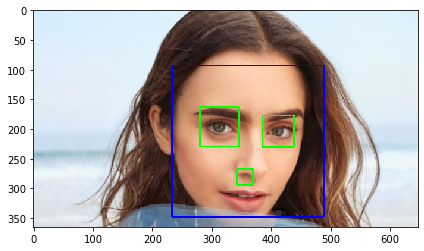

In [15]:
#Preprocessing Data Training (Face and Eye)
training_face = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(training_face) #input the trained model for face detection
training_eye = 'haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(training_eye) #input the trained model for eye detection

#Perform Detection of Cascade Classifier (Detect the face)
faces = face_cascade.detectMultiScale(
            segmentasi, #image
            scaleFactor=1.3, #scale factor
            minNeighbors=5
        )


for (x, y, w, h) in faces: #Draw the rectangular to show the place of face
    cv2.rectangle(foto, (x, y), (x+w, y+h), (0, 0, 255), 2) #Draw rectangle (image, start point, end point, color, thickness)
    eye_re = foto[y:y+h, x:x+w]  #Region starting point and end point to detect the eye inside the face
    eyes = eye_cascade.detectMultiScale(eye_re) #Perform Detection of Cascade Classifier (Detect the eye)
    for(ex,ey,ew,eh) in eyes:  #Draw the rectangular to show the place of eye
        cv2.rectangle(eye_re,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Draw rectangle (image, start point, end point, color, thickness)

io.imshow(foto)

### Face Recognition Using Webcam

In [ ]:
#import library
import cv2
from skimage import measure,color, segmentation, io
from skimage.filters import sobel

#Preprocessing Data Training (Face and Eye)
training_face = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(training_face) #input the trained model for face detection
training_eye = 'haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(training_eye) #input the trained model for eye detection
camera = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame using webcam
    s, foto_live = camera.read()
    
    #RGB to Grayscale
    gray = cv2.cvtColor(foto_live, cv2.COLOR_BGR2GRAY)
    
    #Contour Detection using Sobel Operation
    edges = sobel(gray)
    
    #Segmentation
    segmentasi_slic = segmentation.slic(edges, n_segments = 1000)
    segmentasi = color.label2rgb(segmentasi_slic, foto_live, kind = 'avg')

    #Perform Detection of Cascade Classifier (Detect the face)
    faces = face_cascade.detectMultiScale(
            segmentasi,
            scaleFactor=1.3, #scale factor
            minNeighbors=5
        )

  
    for (x, y, w, h) in faces: #Draw the rectangular to show the place of face
        cv2.rectangle(foto_live, (x, y), (x+w, y+h), (0, 0, 255), 2) #Draw rectangle (image, start point, end point, color, thickness)
        eye_re = foto_live[y:y+h, x:x+w] #Region starting point and end point to detect the eye inside the face
        eyes = eye_cascade.detectMultiScale(eye_re) #Perform Detection of Cascade Classifier (Detect the eye)
        for(ex,ey,ew,eh) in eyes: #Draw the rectangular to show the place of eye
            cv2.rectangle(eye_re,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Draw rectangle (image, start point, end point, color, thickness)
    
    # Display the resulting frame
    cv2.imshow('Face Recognition Using Webcam', foto_live) #Show the result
    
    if cv2.waitKey(1) & 0xFF == ord('q'): #The webcam will always open until 'q' is pressed
        break

# When done, release the webcam / camera
camera.release()
cv2.destroyAllWindows()

### Face Recognition Using Webcam (without Segmentation and Sobel Operation)

In [16]:
#import library
import cv2
from skimage import measure,color, segmentation, io
from skimage.filters import sobel

#Preprocessing Data Training Face and Eye
training_face = 'C:/Users/Diaz Prakoso/Anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(training_face) #input the trained model for face detection
training_eye = 'C:/Users/Diaz Prakoso/Anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml'
eye_cascade = cv2.CascadeClassifier(training_eye) #input the trained model for eye detection
camera = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame using webcam
    s, foto_live = camera.read()
    
    #RGB to Grayscale
    gray = cv2.cvtColor(foto_live, cv2.COLOR_BGR2GRAY)

    #Perform Detection of Cascade Classifier (Detect the face)
    faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.3, #scale factor
            minNeighbors=5)

  
    for (x, y, w, h) in faces: #Draw the rectangular to show the place of face
        cv2.rectangle(foto_live, (x, y), (x+w, y+h), (0, 0, 255), 2) #Draw rectangle (image, start point, end point, color, thickness)
        eye_re = foto_live[y:y+h, x:x+w] #Region starting point and end point to detect the eye insisde the face
        eyes = eye_cascade.detectMultiScale(eye_re) #Perform Detection of Cascade Classifier (Detect the eye)
        for(ex,ey,ew,eh) in eyes: #Draw the rectangular to show the place of eye
            cv2.rectangle(eye_re,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) #Draw rectangle (image, start point, end point, color, thickness)
    
    # Display the resulting frame
    cv2.imshow('Face Recognition Using Webcam', foto_live) #Show the result
    
    if cv2.waitKey(1) & 0xFF == ord('q'): #The webcam will always open until 'q' is pressed
        break

# When done, release the webcam / camera
camera.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
